<a href="https://colab.research.google.com/github/Raisa-Rahman-Rodela/NLP-project/blob/main/Final_Code_For_NLP_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import torch
import re
import gc


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(filepath_or_buffer="/content/drive/MyDrive/431/2/train.csv")
df.head()

,id,comments,label
0,1,.... ঐ ইন্দুর তোই মরছ নাই?,1
1,2,#গেবনের শেষে আইসা আপনার মুখোশ টা খুলছে এতেই আম...,1
2,3,✈✈✈✈��� মুরগি চোরের পাছায় ডুকবি আর মারবি।।।,1
3,4,১৮ কোটির চোদা খাওয়া শেষে এখন ১৫০কোটির চোদা খাব...,1
4,5,২য় মীর জাফরের মুখে মুতে দে...,1


In [ ]:
hate_comment = df[df.label == 1]
hate_comment.head()

,id,comments,label
0,1,.... ঐ ইন্দুর তোই মরছ নাই?,1
1,2,#গেবনের শেষে আইসা আপনার মুখোশ টা খুলছে এতেই আম...,1
2,3,✈✈✈✈��� মুরগি চোরের পাছায় ডুকবি আর মারবি।।।,1
3,4,১৮ কোটির চোদা খাওয়া শেষে এখন ১৫০কোটির চোদা খাব...,1
4,5,২য় মীর জাফরের মুখে মুতে দে...,1


In [ ]:
normal_tweet = df[df.label == 0]
normal_tweet.head()

,id,comments,label
19324,19325,ঃ ভাইয়া হাসতে হাসতে আমার পেটে ব্যথা হয়ে গেছে। ...,0
19325,19326,ঃ রিফাত বিশ্বাস লোকটা কে?শুনছিলাম শুধু রিফাত।এ...,0
19326,19327,:: খালেদা জিয়ার ৩৯ তম জন্মদিন ! ১৯৭৫ সালের ১৫ ...,0
19327,19328,! মজা পাইলাম।। শেখ হাসিনার পা চাটা গোলাম।।��,0
19328,19329,? ? এর সময় দেখেন যখন কুপানো শেষ তখন তার তার দি...,0


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re

In [ ]:
#distributions
df_Stat=df[['label','comments']].groupby('label').count().reset_index()
df_Stat.columns=['label','count']
df_Stat['percentage']=(df_Stat['count']/df_Stat['count'].sum())*100
df_Stat

,label,count,percentage
0,0,20900,51.959029
1,1,19324,48.040971


In [ ]:
def process_commnets(comment):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",comment.lower()).split())

In [ ]:
df['processed_comments'] = df['comments'].apply(process_commnets)
df.head()

,id,comments,label,processed_comments
0,1,.... ঐ ইন্দুর তোই মরছ নাই?,1,
1,2,#গেবনের শেষে আইসা আপনার মুখোশ টা খুলছে এতেই আম...,1,
2,3,✈✈✈✈��� মুরগি চোরের পাছায় ডুকবি আর মারবি।।।,1,
3,4,১৮ কোটির চোদা খাওয়া শেষে এখন ১৫০কোটির চোদা খাব...,1,
4,5,২য় মীর জাফরের মুখে মুতে দে...,1,


In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X = df['comments']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = None)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [ ]:
x_train_counts = count_vect.fit_transform(X_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

In [ ]:
print(x_train_counts.shape)
print(x_train_tfidf.shape)

(32179, 5806)
(32179, 5806)


In [ ]:
x_test_counts = count_vect.transform(X_test)
x_test_tfidf = transformer.transform(x_test_counts)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500)
model.fit(x_train_tfidf,y_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
predictions = model.predict(x_test_tfidf)

In [ ]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

[[3165 1067]
 [1270 2543]]
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      4232
           1       0.70      0.67      0.69      3813

    accuracy                           0.71      8045
   macro avg       0.71      0.71      0.71      8045
weighted avg       0.71      0.71      0.71      8045



In [ ]:
#Building XGBoost Model
from xgboost import XGBClassifier
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)
model_bow.fit(x_train_tfidf,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.9, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=22, ...)

In [ ]:
predict_xgb = model_bow.predict(x_test_tfidf)

In [ ]:
print(confusion_matrix(y_test,predict_xgb))
print(classification_report(y_test,predict_xgb))

[[3303  929]
 [1494 2319]]
              precision    recall  f1-score   support

           0       0.69      0.78      0.73      4232
           1       0.71      0.61      0.66      3813

    accuracy                           0.70      8045
   macro avg       0.70      0.69      0.69      8045
weighted avg       0.70      0.70      0.70      8045



In [ ]:
#SVM Model
from sklearn import svm
lin_clf = svm.LinearSVC()
lin_clf.fit(x_train_tfidf,y_train)

LinearSVC()

In [ ]:
predict_svm = lin_clf.predict(x_test_tfidf)

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score
print(confusion_matrix(y_test,predict_svm))
print(classification_report(y_test, predict_svm))

[[3260  972]
 [1416 2397]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      4232
           1       0.71      0.63      0.67      3813

    accuracy                           0.70      8045
   macro avg       0.70      0.70      0.70      8045
weighted avg       0.70      0.70      0.70      8045



In [ ]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(random_state=42)

In [ ]:
#Building Logistic Regression  Model
logreg.fit(x_train_tfidf,y_train)

LogisticRegression(random_state=42)

In [ ]:
predict_log = logreg.predict(x_test_tfidf)

In [ ]:
print(confusion_matrix(y_test,predict_log))
print(classification_report(y_test, predict_log))

[[3309  923]
 [1421 2392]]
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      4232
           1       0.72      0.63      0.67      3813

    accuracy                           0.71      8045
   macro avg       0.71      0.70      0.70      8045
weighted avg       0.71      0.71      0.71      8045



In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(x_train_tfidf, y_train)

MultinomialNB()

In [ ]:
predict_nb = NB.predict(x_test_tfidf)

In [ ]:
print(confusion_matrix(y_test,predict_nb))
print(classification_report(y_test, predict_nb))

[[3345  887]
 [1478 2335]]
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      4232
           1       0.72      0.61      0.66      3813

    accuracy                           0.71      8045
   macro avg       0.71      0.70      0.70      8045
weighted avg       0.71      0.71      0.70      8045



In [ ]:
#Test Data Set
df_test = pd.read_csv("/content/drive/MyDrive/431/2/test.csv")
df_test.head()

,coment,id,lebel
0,। গরুর বাচ্চা কুকুরের বাচ্চা,1,1
1,অন্যায় দাবি করছে ক্রিকেটাররা অথচ দোষ নাকি বোর্...,2,1
2,আইসিসিকে এই তথ্য দিলো কে?শুওরের বাচ্চা পাপন,3,1
3,আওয়ামীলীগ ভারতের দালাল। মোদি নির্বাচিত হওয়ার প...,4,1
4,আগারওয়াল পিউর বাস্টার্ড এর কিছু হবে না???,5,1


In [ ]:
df_test.shape

(5029, 3)

In [ ]:
X = df_test['coment']
x_test_counts = count_vect.transform(X)
x_test_tfidf = transformer.transform(x_test_counts)

In [ ]:
df_test['predict_nb'] = NB.predict(x_test_tfidf)
df_test[df_test['predict_nb']==1]

,coment,id,lebel,predict_nb
0,। গরুর বাচ্চা কুকুরের বাচ্চা,1,1,1
2,আইসিসিকে এই তথ্য দিলো কে?শুওরের বাচ্চা পাপন,3,1,1
8,আবাল তুই,9,1,1
9,আবাল দিয়ে দেশটা ভরে গেছে,10,1,1
10,আমার মতে পত্যক ক্রিকেটার এখন সাকিবের পাশে থাকা...,11,1,1
...,...,...,...,...
5000,সেফাত উল্লার কথাগুলো তেমন ভাল না,5001,0,1
5003,সোহেল চৌধুরীতো অনেক অাগে মারা গেছে এসব ফালতু ভ...,5004,0,1
5007,স্টার জলসা জি বাংলা ধংশোকরলো সোনার বাংলা এই হল...,5008,0,1
5015,হাত পা কাপতেছে আমারএটা কি দেখলাম,5016,0,1


In [ ]:
df_test['predict_svm'] = NB.predict(x_test_tfidf)
df_test['predict_rf'] = model.predict(x_test_tfidf)
df_test.head()

,coment,id,lebel,predict_nb,predict_svm,predict_rf
0,। গরুর বাচ্চা কুকুরের বাচ্চা,1,1,1,1,1
1,অন্যায় দাবি করছে ক্রিকেটাররা অথচ দোষ নাকি বোর্...,2,1,0,0,0
2,আইসিসিকে এই তথ্য দিলো কে?শুওরের বাচ্চা পাপন,3,1,1,1,1
3,আওয়ামীলীগ ভারতের দালাল। মোদি নির্বাচিত হওয়ার প...,4,1,0,0,0
4,আগারওয়াল পিউর বাস্টার্ড এর কিছু হবে না???,5,1,0,0,0


In [ ]:
file_name = 'test_predictions_Twitter Hate Analysis.csv'
df_test.to_csv(file_name,index=False)

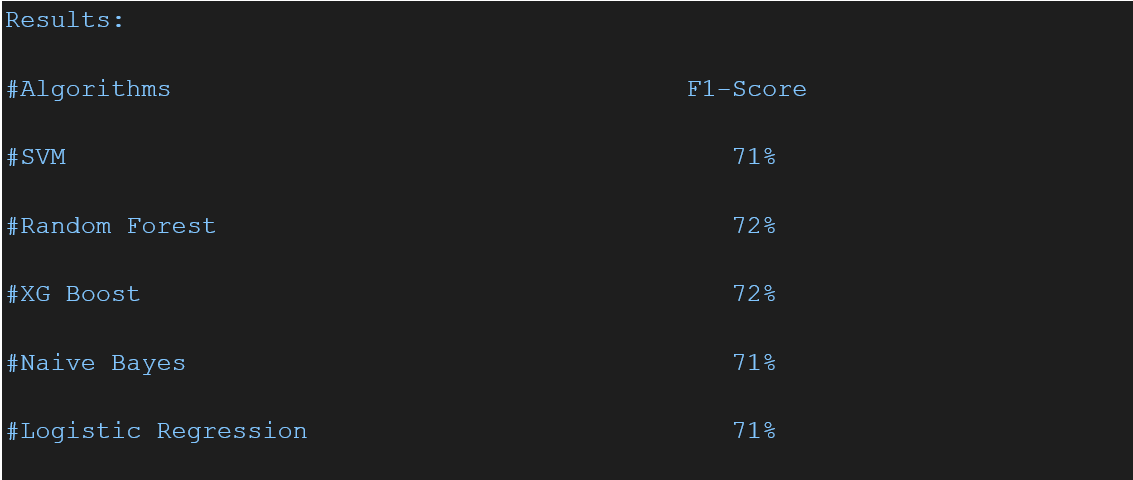
